<a href="https://colab.research.google.com/github/cambo2018/Advanced-Dynamics/blob/main/Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install whit-phys-util

     |████████████████████████████████| 10.9 MB 11.4 MB/s 


In [ ]:
import whit_phys_util as buc
from sympy import *
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
repo = buc.local_repository("https://github.com/cambo2018/Advanced-Dynamics")

# Taylor Series

In [ ]:
f = #function of choice
a = #point expanded around
terms = #how many terms in series
Taylor = sum((x-a)**n/factorial(n) * f.diff(x, n).subs(x,a) for n in range(terms))

# Oscillations

## Forcing Function

In [ ]:
var('n', integer=True, positive=True)

f0 = integrate((1/T)*f, (t, -T/2, T/2))

def fn(n): # amplitude function???
  return integrate(2/T*cos(n*w*t)*f, (t, -T/2, T/2))

def f_approx(nmax, t): # fourier series approximation
  f_sym = f0 + Sum(fn(n)*cos(n*w*t), (n, 1, nmax))
  return f_sym.doit()

## Oscillator

In [ ]:
a0 = f0/w_0**2

def A(n, w): # amplitude function
  return fn(n)/sqrt((w_0**2 - (n*w)**2)**2 + (2*B*n*w)**2)

def delta(n, w):
  return atan2(2*B*n*w, w_0**2 - n**2*w**2)

def x(nmax, t, w): # long term behavior
  sym_x = a0 + Sum(A(n, w)*cos(n*w*t-delta(n, w)), (n, 1, nmax))
  return sym_x.doit()

# ODE Solver

In [ ]:
# from scipy.integrate import solve_ivp
# from numpy import linspace

In [ ]:
def solver(t, u):
  [x, xdot] = u
  function = [u[1], f(u)]
  return function

In [ ]:
time = [0,10]
tspan = np.linspace(0,time[-1],2837)

y0 = [u[0] IC, u[1] IC]

solution = solve_ivp(solver, time, y0, t_eval=tspan)

In [ ]:
# Plotting example
fig, ax = plt.subplots(2)

ax[0].plot(solution.t, solution.y[0])

ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Angle (rad)')

# EigenStuff

In [ ]:
# from sympy import *

In [ ]:
k, m, M = symbols('k m M', positive=True)

M = Matrix([[m,0,0],[0,M,0],[0,0,m]])
K = Matrix([[k,-k,0],[-k,2*k,-k],[0,-k,k]])

A = M.inv()*K

In [ ]:
sol = A.eigenvects()
sol

In [ ]:
omega1 = sqrt(sol[0][0])
omega2 = sqrt(sol[1][0])
omega3 = sqrt(sol[2][0])

a1 = sol[0][2][0]
a2 = sol[1][2][0]
a3 = sol[2][2][0]

# Linear Fit

In [ ]:
fitTable, fitFunc = buc.prettyPolyFit(df['Time (s)'], df['Position (m)'])
fitTable

,slope,intercept
value,3.073636,6.686364
uncertainty,0.231210,1.367854


In [ ]:
print(f"The slope is ({fitTable['slope']['value']:.1f} ± {fitTable['slope']['uncertainty']:.1f}) m/s")
print(f"The intercept is ({fitTable['intercept']['value']:.1f} ± {fitTable['intercept']['uncertainty']:.1f}) m")

The slope is (3.1 ± 0.2) m/s
The intercept is (6.7 ± 1.4) m


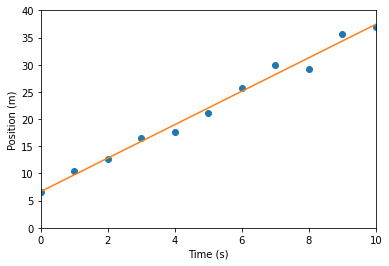

In [ ]:
fig, ax = plt.subplots()
ax.plot(df['Time (s)'], df['Position (m)'], "o");
ax.set_xlabel("Time (s)");
ax.set_ylabel("Position (m)");
ax.set_xlim(0,10);
ax.set_ylim(0,40);
t_fit = np.linspace(min(df['Time (s)']), max(df['Time (s)']),2);
ax.plot(t_fit, fitFunc(t_fit));

In [ ]:
buc.notebook_to_pdf(repo, author="Cameron Brewer", title="Title")